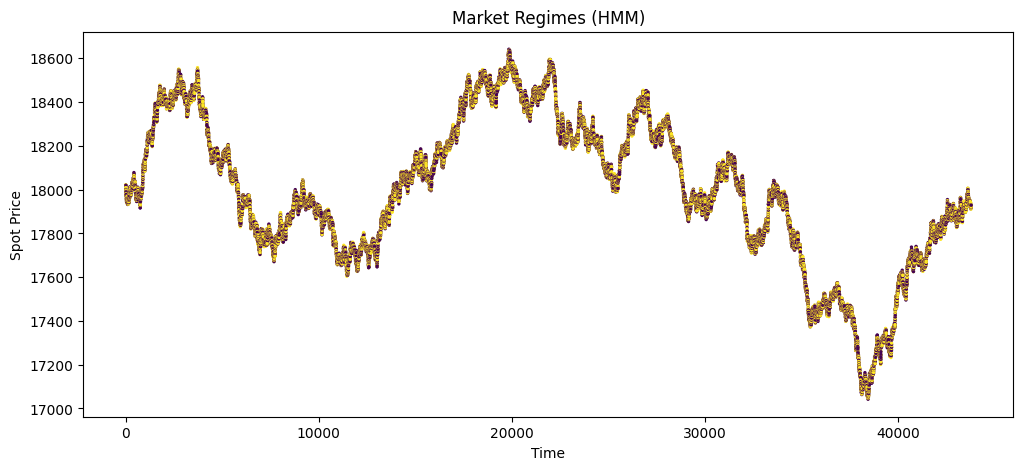

Regime plot generated ✅


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM
import os

%matplotlib inline

# Create plots folder
os.makedirs("../plots", exist_ok=True)

# Load data
df = pd.read_csv("../data/nifty_features_5min.csv")

# ---- FIX 1: Clean returns ----
df["returns"] = df["returns"].replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=["returns"])

# ---- FIX 2: Reshape + stabilize input ----
X = df[["returns"]].values

# Add tiny noise to avoid zero-variance
X = X + 1e-6 * np.random.randn(*X.shape)

# ---- FIX 3: Robust HMM configuration ----
model = GaussianHMM(
    n_components=3,
    covariance_type="diag",
    n_iter=100,
    init_params="stmc",   # initialize start, transition, means, covars
    params="stmc",
    random_state=42
)

# Fit model
model.fit(X)

# Predict regimes
states = model.predict(X)
df["regime"] = states

# ---- Plot ----
plt.figure(figsize=(12,5))
plt.scatter(
    df.index,
    df["close_spot"],
    c=df["regime"],
    cmap="viridis",
    s=2
)
plt.title("Market Regimes (HMM)")
plt.xlabel("Time")
plt.ylabel("Spot Price")

plt.savefig("../plots/regime_chart.png", dpi=300)
plt.show()

print("Regime plot generated ✅")
